## Assignment 5.2
## Support vector machines

The goal of this task is to visualize two-dimensional decision boundaries, margins and support vectors for linear and kernel SVMs in case of hard and soft margins.

Generate a dataset (use the functions ```sklearn.datasets.make_blobs``` and ```sklearn.datasets.make_circles``` for the linear and the kernel SVM cases respectively). 

Fit an SVM using ```sklearn.svm.svc```, use ```kernel=linear``` or ```kernel=rbf``` parameter to specify the kernel and the parameter ```C``` to specify whether the margin is soft or hard. Visualize the decision boundary by using the function ```model.decision_function``` and make a scatter plot of the support vectors found in ```model.support_vectors_```. In order to visualize the decision boundary, one option might be to generate a two-dimensional grid using ```np.meshgrid``` and then plot it for selected iso-contours at $f(x)=\{-1,0,1\}$ levels which corresponds to the margin and the decision boundary. A useful function for plotting iso-contours is ```matplotlib.pyplot.contour```.

You are expected to produce 4 plots (hard and soft margin for the linear and RBF cases) similar to the examples below.

In [95]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import contour
from sklearn.svm import SVC
from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_circles
from sklearn.decomposition import PCA

# Фукция рисующая границу решений и 2д данные

In [281]:
def plot_svc_decision_function(model, train_data, train_labels, ax=None):
    if len(train_data[0]) == 3:
        z = [False, True, True]
        Plot_train_data =  train_data.compress(z, axis=1)
    else:
        Plot_train_data =  train_data
    s = model.support_
    for i in range(len(train_data)):
        if i in s:
            plt.plot(Plot_train_data[i][0], Plot_train_data[i][1],'go' if (train_labels[i] == 1.0) else 'bo')
        else:
            plt.plot(Plot_train_data[i][0], Plot_train_data[i][1],'gx' if (train_labels[i] == 1.0) else 'bx')
    if model.kernel is 'linear':
        w = model.coef_[0]
        const = model.intercept_[0]
        a = -w[1] / w[2]
        xx = np.linspace(-1.5, 3.5)
        yy = a * xx - (const) / w[2]
        y1 = a* xx - (const + 1) / w[2]
        y2 = a* xx - (const - 1) / w[2]
        plt.plot(xx, y1, 'r--')
        plt.plot(xx, y2, 'r--')
        plt.plot(xx, yy, 'r-')
    if model.kernel is 'rbf':
        h = .005
        x_min, x_max = train_data[:, 0].min() - 0.75, train_data[:, 0].max() + 0.75
        y_min, y_max = train_data[:, 1].min() - 0.75, train_data[:, 1].max() + 0.75
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contour(xx, yy, Z, cmap=plt.cm.coolwarm)
    pass

# Генерация Линейно разделимых данных

In [100]:
X_1, y_1 = make_blobs(n_samples=100, centers=2, cluster_std = 0.5, n_features=2, random_state=0)
a = []
a.append([2*y-1 for y in y_1])
y_1 = a[0]
x0 = np.array(len(X_1)*[1])
X_1 = np.vstack((x0.T, np.array(X_1).T)).T

# Жесткие границы

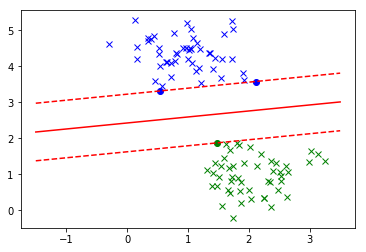

In [282]:
model = SVC(kernel='linear', C = 0.99)
model = model.fit(X_1, y_1)
plot_svc_decision_function(model, X_1, y_1)

# Мягкие границы

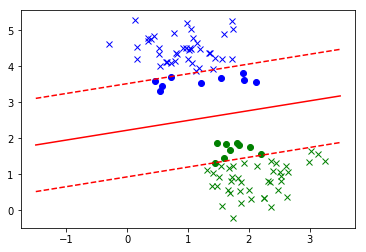

In [314]:
model = SVC(kernel='linear', C=0.05)
model = model.fit(X_1, y_1)
plot_svc_decision_function(model, X_1, y_1)

# Генерация полиномиально разделимых данных

In [287]:
X, Y = make_circles(noise = 0.05, factor = 0.5)

# Жесткие границы

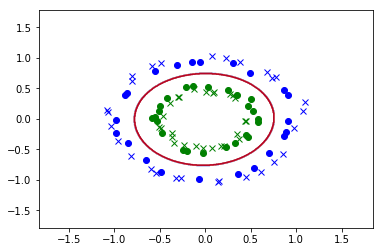

In [311]:
circle_model = SVC(kernel='rbf', C = 1)
circle_model = circle_model.fit(X, Y)
plot_svc_decision_function(circle_model, X, Y)

# Мягкие границы

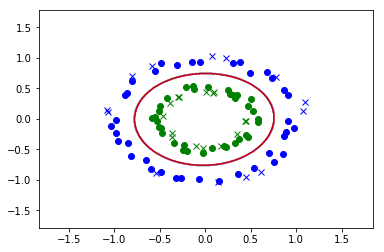

In [310]:
circle_model = SVC(kernel='rbf', C=0.5)
circle_model = circle_model.fit(X, Y)
plot_svc_decision_function(circle_model, X, Y)

/Users/Kuzmin/anaconda/lib/python2.7/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/Kuzmin/anaconda/lib/python2.7/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/Kuzmin/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:631: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


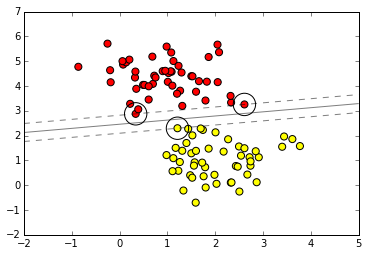

In [5]:
plt.scatter();

plot_decision_function(model);

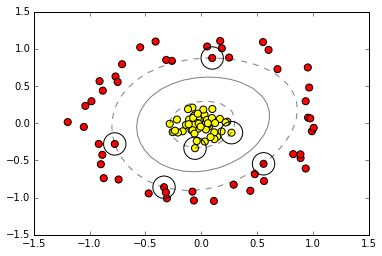

In [16]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles()
plot_svc_decision_function();